# A Funny Triangle Question

by Kunal Marwaha

### The Question

How many triangles are in a triangle composed of smaller triangles?

![triangles!](http://mathworld.wolfram.com/images/eps-gif/TriangleTilings_551.gif)

### First Thoughts

Suppose there are $n$ smaller triangles per side. Obviously, when $n=1$, then the answer is $1$.

To compose a large triangle from smaller triangles, you can interleave rows of face-up triangles with rows of face-down triangles. 

You can build rows of $1,2,...,n$ face-up triangles interleaved with rows of $1,2,...,n-1$ face-down triangles. 

These stacked rows of triangles inspire the series $1, 1+2, 1+2+3, ...$. These numbers are known as the "triangle numbers". Thus, the $j^{th}$ triangle number is $T_j = 1+2+...+j = (j+1)(j/2)$.

There are a total of $(1+2+...+n)+(1+2+...+n-1) = ((n+1)n/2) + (n(n-1)/2) = n^2$ of the smaller triangles in the large triangle. This is perfectly sensible, since an $n$-fold increase in linear proportion magnifies the area by $n^2$.

### Intermediate Triangles: Face-Up

We can also count all the intermediate-sized triangles. (This is only relevant for $n\ge 3$.)

Let's inspect triangles with $k$ smaller triangles per side. You can certainly build rows of $1,2,...,n-k+1$ face-up triangles. So, we can immediately count the total number of face-up triangles by taking a partial sum of the triangle number series.

#### Analytic Solution

Number of face-up triangles = $\sum_{k=1}^{n} \sum_{i=1}^{n-k+1} i = \sum_{k=1}^{n} \sum_{i=1}^{k} i = \sum_{k=1}^n T_k = \sum_{k=1}^n (k+1)(k/2) =\sum_{k=1}^n k^2/2 + k/2$ .

This simplifies to $(2n+1)(n+1)(n/12) + (n+1)(n/4)$ since both $\sum_{i=1}^n i = T_n$ and $\sum_{i=1}^n i^2$ have a closed-form expression. Thus, there are $(n/12)(n+1)(2n+1+3) = n(n+1)(n+2)/6$ face-up triangles in the large triangle.

#### Code and Verification

In [1]:
from __future__ import division

In [2]:
def tr(n):
    return int(n*(n+1)/2)
def num_faceup(n):
    return int(n*(n+1)*(n+2)/6)

In [3]:
n_max = 100
assert [sum(map(tr, range(1,n+1))) for n in range(1,n_max+1)] == \
    [num_faceup(n) for n in range(1,n_max+1)], "num_faceup function isn't correct"

The above ```assert``` checks that the ```num_faceup``` closed-form expression exactly matches the partial sum of the triangle number series.

#### Result

In [4]:
n_max=20
print("Number of face-up triangles when n=1.."+str(n_max)+":")
print([num_faceup(n) for n in range(1,n_max+1)])

Number of face-up triangles when n=1..20:
[1, 4, 10, 20, 35, 56, 84, 120, 165, 220, 286, 364, 455, 560, 680, 816, 969, 1140, 1330, 1540]


### Intermediate Triangles: Face-Down

Counting the face-down triangles is trickier. When $k=1$, as discussed earlier, there are $T_{n-1} = n(n-1)/2$ face-down triangles. The biggest face-down triangle that fits in the large triangle is the largest integer no more than $n/2$ (let's call this $m$). If $n$ is even, it fits right in the middle.

Inspecting triangles of $k$ smaller triangles per side, you can build overlapping rows of $1,2,...,n+1-2k$ face-down triangles (supposing $n\ge 2k$). Now, we can count the total number of face-down triangles by taking a partial sum of odd or even terms in the triangle number series.

Number of face-down triangles = $\sum_{k=1}^{m} \sum_{i=1}^{n+1-2k} i  = \sum_{k=1}^{m} T_{n+1-2k} = T_{n-1} + T_{n-3} + ...$

#### Analytic Solution (even $n$)

This summation can be done analytically. First, note that $T_n - T_{n-1} = \sum_{i=1}^n i - \sum_{i=1}^{n-1} i = n$. Also, recall that $\sum_{k=1}^n T_k = n(n+1)(n+2)/6$ is the number of face-up triangles in a large triangle of size $n$.

Suppose $n$ is even. We can split up the triangle series into even and odd parts; that is, $\sum_{k=1}^n T_k = \sum_{k=1}^{n/2} (T_{2k} + T_{2k-1})$. By the above note, $\sum_{k=1}^{n/2} (T_{2k} - T_{2k-1}) = \sum_{k=1}^{n/2} (2k) = (n/2)(n+2)/2$. 

We can then determine the partial sum of odd terms in the triangle series, as $0.5[\sum_{k=1}^{n/2} (T_{2k} + T_{2k-1}) - \sum_{k=1}^{n/2} (T_{2k} - T_{2k-1})] = \sum_{k=1}^{n/2} T_{2k-1} = \sum_{k=1}^{n/2} T_{n+1-2k}$.

Plugging all expressions in, the number of face-down triangles for even $n$ is $0.5[n(n+1)(n+2)/6  - n(n+2)/4] = n(n+2)(2n+2)/24 -3n(n+2)/24 = n(2n-1)(n+2)/24 = (2n^3 + 3n^2 - 2n)/24$.

#### Analytic Solution (odd $n$)

To be exact, the above expression is a summation for the first $n/2$ odd terms in the triangle series, assuming $n$ is even. We can easily find the sum of the first $n/2$ even terms, since $\sum_{k=1}^{n} T_k - \sum_{k=1}^{n/2} T_{2k-1} = \sum_{k=1}^{n/2} T_{2k}$. Plugging in: $n(n+1)(n+2)/6 - n(2n-1)(n+2)/24 = n(2n+5)(n+2)/24$.

When $n$ is odd, the number of face-down triangles is the sum of even terms in the triangle series, from $2$ to $n-1$. That is exactly the summation above, except with $n$ relabeled to $n-1$. 

Precisely, let $x=n-1$ be odd. (Then, $n$ is even.) Then, $\sum_{k=1}^{n/2} T_{2k} = \sum_{k=1}^{(x-1)/2} T_{2k} = \sum_{k=1}^{(x-1)/2} T_{x+1-2k}$ describes the number of face-down triangles in a large triangle of size $x$ (since in this case, $m=(x-1)/2$). This quantity is $n(2n+5)(n+2)/24 = (x-1)(2x+3)(x+1)/24 = (2x^3 + 3x^2 - 2x - 3)/24$.

There are other solutions for the odd $n$ case, but you will arrive at the same answer. I encourage you to try a method similar to the even $n$ case with a pencil and paper. It is so rewarding to 'figure it out' yourself.

#### Code and Verification

In [5]:
def num_facedown_even(n):
    return (2*n-1)*n*(n+2)/24
def num_facedown_odd(n):
    return (2*n+3)*(n*n-1)/24
def num_facedown(n):
    return int(num_facedown_even(n)) if n%2==0 else int(num_facedown_odd(n))

In [6]:
n_max = 100
assert [sum(map(tr,range(n-1,0,-2))) for n in range(1,n_max+1)] == \
    [num_facedown(n) for n in range(1,n_max+1)], "num_facedown function isn't correct"

The above ```assert``` checks that the ```num_facedown``` closed-form expressions exactly match the subset sums of the triangle number series (from $T_{n-1}$, to zero, counting backwards by twos).

#### Result

In [7]:
n_max=20
print("Number of face-down triangles when n=1.."+str(n_max)+":")
print([num_facedown(n) for n in range(1,n_max+1)])

Number of face-down triangles when n=1..20:
[0, 1, 3, 7, 13, 22, 34, 50, 70, 95, 125, 161, 203, 252, 308, 372, 444, 525, 615, 715]


#### A fun fact

Note that the solutions for even-sized and odd-sized triangles differ by $3/24=1/8$. The math works out. Strange!

In [8]:
[num_facedown_odd(i) for i in range(1,10+1)]

[0.0, 0.875, 3.0, 6.875, 13.0, 21.875, 34.0, 49.875, 70.0, 94.875]

In [9]:
[num_facedown_even(i) for i in range(1,10+1)]

[0.125, 1.0, 3.125, 7.0, 13.125, 22.0, 34.125, 50.0, 70.125, 95.0]

### Total Number of Triangles

By the symmetry of the drawing, all triangles are either face-up or face-down. So, the total number of triangles in a large triangle (with $n$ smaller triangles per side) can be calculated analytically:

There are $n(n+1)(n+2)/6$  face-up triangles, and $n(2n-1)(n+2)/24$ face-down triangles (when $n$ is even). Thus, there are $n(6n+3)(n+2)/24 = n(2n+1)(n+2)/8 = (2n^3+5n^2+2n)/8$ triangles in a large triangle of even size $n$. (If $n$ is odd, subtract $1/8$ from this expression.)


#### Result

In [10]:
n_max=20
print("Total number of triangles when n=1.."+str(n_max)+":")
print([num_faceup(n) + num_facedown(n) for n in range(1,n_max+1)])

Total number of triangles when n=1..20:
[1, 5, 13, 27, 48, 78, 118, 170, 235, 315, 411, 525, 658, 812, 988, 1188, 1413, 1665, 1945, 2255]


#### Another fun thought

A cheap way to calculate the number of triangles given $n$ is to round the expression for even $n$ (since $1/8 < 1/2$). The following ```assert``` checks that claim.

In [11]:
def num_total(n):
    return round((2*n+1)*(n+2)*n/8)

In [12]:
n_max=100
assert [num_faceup(n) + num_facedown(n) for n in range(1,n_max+1)] == \
    [num_total(n) for n in range(1,n_max+1)], 'num_total rounding doesn\'t work'

### Analysis

You can see that this number grows very fast with $n$.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

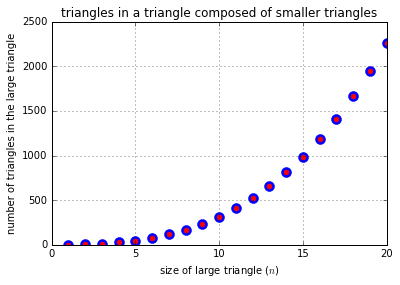

In [14]:
n_max=20
plt.plot(range(1,n_max+1), [num_faceup(n) + num_facedown(n) for n in range(1,n_max+1)], 'b.', markersize=20)
plt.plot(range(1,n_max+1), [num_total(n) for n in range(1,n_max+1)], 'r.', markersize=10)
plt.xlabel("size of large triangle ($n$)")
plt.ylabel("number of triangles in the large triangle")
plt.title("triangles in a triangle composed of smaller triangles")
plt.grid()

It is not exponential, by the way. (Why? Think about it, then read on.)

#### Scaling

Remember that the expression for the solution (for even $n$) is $(2n^3+5n^2+2n)/8$. A-ha! So the asymptotic scaling for this question is $n^3$. This means that when $n$ is very large, there are about $n^3$ triangles contained in the large triangle. 

You can visualize this with the slope of the log-log plot (it should be about 3 as $n$ gets large).

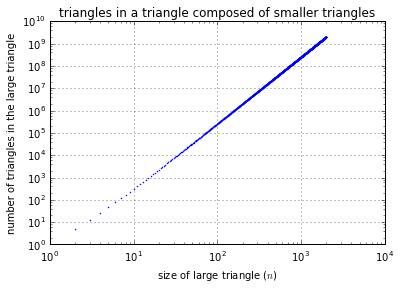

In [15]:
n_max=2000
plt.loglog(range(1,n_max+1), [num_faceup(n) + num_facedown(n) for n in range(1,n_max+1)], 'b.', markersize=2)
plt.xlabel("size of large triangle ($n$)")
plt.ylabel("number of triangles in the large triangle")
plt.title("triangles in a triangle composed of smaller triangles")
plt.grid()

#### The end

But now you know the answer. Go ahead, draw a small example and ask your friends: "How many triangles?" (I've found that $n=4$ is a great example.)

![triangles!](http://mathworld.wolfram.com/images/eps-gif/TriangleTilings_551.gif)

I hope you enjoyed reading this bit on triangles.

Here's the WolframAlpha page on [Tiling Triangles](http://mathworld.wolfram.com/TriangleTiling.html). Triangle image ($n=1,2,3,4$) belongs to WolframAlpha.